In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True

In [2]:
from numpy import exp, argmax, sum, log2
from numpy import inf

# Problem 5: *Integration to $\infty$*

Consider the gamma function, $$\Gamma(a) = \int_0^\infty x^{a-1} e^{-x} \ dx.$$ We want to evaluate this numerically, and we will focus on $a > 1$. Consider a variable transformation of the form: $$z = \frac{x}{c + x}.$$ This will map $x \in [0, \infty)$ to $z \in [0,1]$, allowing us to do this integral numerically in terms of $z$.

For convenience, we express the integrand as $\phi(x) = x^{a-1} e^{-x}$.

<div style="border: 1px solid white; max-width: 97%; padding: 8px">

#### Part A

Plot $\phi(x)$ for $a = 2, 3, 4$.

</div>

In [3]:
def phi(x, a):
    return x ** (a-1) * exp(-x)

In [4]:
x_      = np.linspace(start=0, stop=15, num=400)
a_      = [2, 3, 4]
phi_    = [phi(x_, a_[0]), phi(x_, a_[1]), phi(x_, a_[2])]

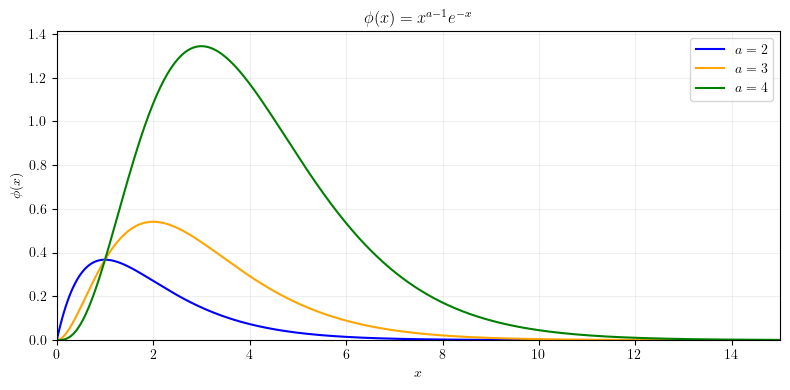

In [5]:
plt.figure(figsize=(8, 4))

plt.title("$\\phi(x) = x^{a-1}e^{-x}$")
plt.xlabel("$x$")
plt.ylabel("$\\phi(x)$")

plt.plot(x_, phi_[0], color="blue",   label="$a=2$")
plt.plot(x_, phi_[1], color="orange", label="$a=3$")
plt.plot(x_, phi_[2], color="green",  label="$a=4$")
plt.legend()

plt.xlim(x_[0], x_[-1])
plt.ylim(bottom=0)

plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

<div style="border: 1px solid white; max-width: 97%; padding: 8px">

#### Part B

For what value of $x$ is the integrand $\phi(x)$ maximum?

</div>

Since $\phi'(x) = a - 1$, the values should be approximately $[1, 2, 3]$, which they are.

In [6]:
max_phi_idx_ = [
    argmax(phi_[0]),
    argmax(phi_[1]),
    argmax(phi_[2])
]

max_x_ = x_[max_phi_idx_]
print(max_x_)

[1.01503759 1.9924812  3.0075188 ]


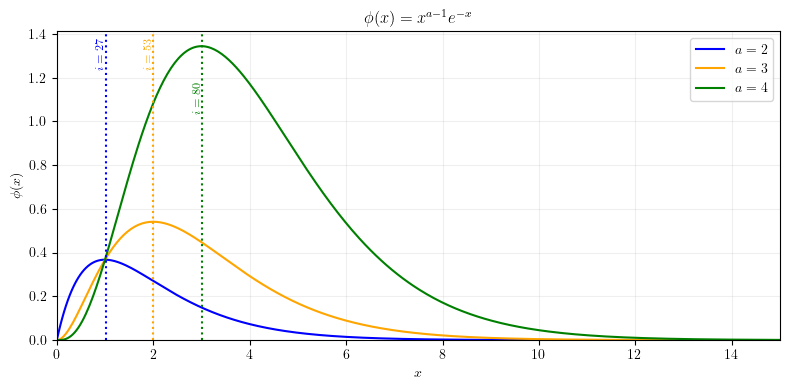

In [7]:
plt.figure(figsize=(8, 4))

plt.title("$\\phi(x) = x^{a-1}e^{-x}$")
plt.xlabel("$x$")
plt.ylabel("$\\phi(x)$")

plt.plot(x_, phi_[0], color="blue",   label="$a=2$")
plt.plot(x_, phi_[1], color="orange", label="$a=3$")
plt.plot(x_, phi_[2], color="green",  label="$a=4$")
plt.legend()

plt.axvline(x_[max_phi_idx_[0]], linestyle=":", color="blue")
plt.axvline(x_[max_phi_idx_[1]], linestyle=":", color="orange")
plt.axvline(x_[max_phi_idx_[2]], linestyle=":", color="green")

plt.text(x_[max_phi_idx_[0]], 1.24,
         f"$i = {max_phi_idx_[0]}$",
         rotation=90,
         fontsize="small",
         horizontalalignment="right",
         color="blue")
plt.text(x_[max_phi_idx_[1]], 1.24,
         f"$i = {max_phi_idx_[1]}$",
         rotation=90,
         fontsize="small",
         horizontalalignment="right",
         color="orange")
plt.text(x_[max_phi_idx_[2]], 1.04,
         f"$i = {max_phi_idx_[2]}$",
         rotation=90,
         fontsize="small",
         horizontalalignment="right",
         color="green")

plt.xlim(x_[0], x_[-1])
plt.ylim(bottom=0)

plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

<div style="border: 1px solid white; max-width: 97%; padding: 8px">

#### Part C

Choose the value $c$ in our transformation such that the peak of the integrand occurs at $z = 1/2$. What value is $c$?

This choice spreads the interesting regions of integrand over the domain $z ∈[0, 1]$, making our numerical integration more accurate.

</div>


To find $c$,
$$
z = \frac{x}{x+c} \implies c = x\bigg(\frac{1}{z} - 1\bigg),
$$
and for $z_\text{max} = 1/2$, $c = x_\text{max}$.


In [8]:
def z(x, c):
    return x / (x + c)

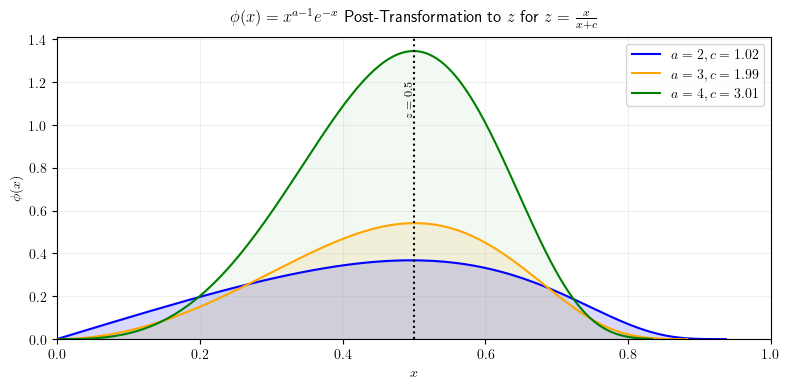

In [9]:
max_z_ = 1/2

plt.figure(figsize=(8, 4))

title = "$\\phi(x) = x^{a-1}e^{-x}$ Post-Transformation to $z$ for $z = \\frac{x}{x+c}$"
plt.title(title, y=1.02)
plt.xlabel("$x$")
plt.ylabel("$\\phi(x)$")

plt.plot(z(x_, max_x_[0]), phi_[0], color="blue",   label=f"$a=2, c={max_x_[0]:.2f}$")
plt.plot(z(x_, max_x_[1]), phi_[1], color="orange", label=f"$a=3, c={max_x_[1]:.2f}$")
plt.plot(z(x_, max_x_[2]), phi_[2], color="green",  label=f"$a=4, c={max_x_[2]:.2f}$")
plt.legend()

plt.axvline(max_z_, linestyle=":", color="black")
plt.text(max_z_, 1.04,
         f"$z = {max_z_}$",
         rotation=90,
         fontsize="small",
         horizontalalignment="right",
         color="black")

plt.fill_between(z(x_, max_x_[0]), phi_[0], color="blue", alpha=0.15)
plt.fill_between(z(x_, max_x_[1]), phi_[1], color="orange", alpha=0.10)
plt.fill_between(z(x_, max_x_[2]), phi_[2], color="green", alpha=0.05)

plt.xlim(0, 1)
plt.ylim(bottom=0)

plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

<div style="border: 1px solid white; max-width: 97%; padding: 8px">

#### Part D

Find $\Gamma(a)$ for a few different value of $a > 1$ using and numerical integration method you wish, integrating from $z = 0$ to $z = 1$. Keep the number of points in your quadrature to a reasonable amount ($N \leq 50$).

Don’t forget to include the factors you pick up when changing $dx$ to $dz$.

Note that roundoff error may come into play in the integrand. Recognizing that you can write $x^{a−1} = e^{(a−1) \ln x}$ can help minimize this.

</div>

In [37]:
def x(z, c):
    return ((z * c) / (1 - z))

def phi_transform(z, c, a):
    return phi(x(z, c), a) * c / ((1 - z)**2)

In [ ]:
# Simpson's rule
def integrate(f, z, c, a):
    h = z[1] - z[0]
    ``
    z_low  = z[1:-2]
    z_mid  = z_low + h/2
    z_high = z[2:-1]
    
    return h / 6 * sum( f(z_low, c, a) + 4 * f(z_mid, c, a) + f(z_high, c, a) )

In [42]:
new_z_ = np.linspace(start=0., stop=1., num=50)

I1 = integrate(phi_transform, new_z_, c=max_x_[0], a=a_[0])
I2 = integrate(phi_transform, new_z_, c=max_x_[1], a=a_[1])
I3 = integrate(phi_transform, new_z_, c=max_x_[2], a=a_[2])

print(f"Gamma[2] = {I1:.3f}")
print(f"Gamma[3] = {I2:.3f}")
print(f"Gamma[4] = {I3:.3f}")

Gamma[2] = 1.000
Gamma[3] = 2.000
Gamma[4] = 6.000
